# LST across time for different LULCs

Looking for trends within industrial areas and CBD/Downtown areas
- No obvious upward trend in LST/downward trend in LST

## Filtering scenes with `x`% cloud cover

In [ ]:
import pandas as pd
import zipfile
import os
import requests
import geopandas as gpd
import hvplot.pandas
import pandas as pd
import rasterio
from pyproj import Transformer
from shapely.geometry import Point
from io import BytesIO
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [9]:
# List of zip file paths for metadata
zip_file_paths = [
    r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat5\L5_Metadata.zip",
    r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat7\L7_Metadata.zip",
    r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\L8_Metadata.zip",
    r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat9\L9_Metadata.zip"
]

# List to store dates and times of low cloud cover images
low_cloud_cover_dates = []

# Process each zip file
for zip_file_path in zip_file_paths:
    with zipfile.ZipFile(zip_file_path, 'r') as z:
        # List all contained files that end with .csv
        csv_files = [f for f in z.namelist() if f.endswith('.csv')]
        
        # Process each CSV file
        for csv_file in csv_files:
            with z.open(csv_file) as f:
                # Read the file into a pandas DataFrame
                df = pd.read_csv(f)
                
                # Filter data where CLOUD_COVER <= 30
                if df['CLOUD_COVER'].iloc[0] <= 30:
                    # Extract the date and time from the file name
                    date_time = os.path.basename(csv_file).split('_')[2] + '_' + os.path.basename(csv_file).split('_')[3].split('.')[0]
                    low_cloud_cover_dates.append(date_time)

# Print or return the dates for further processing
print("Dates with cloud cover <= 30%:")
for date_time in low_cloud_cover_dates:
    print(date_time)

Dates with cloud cover <= 30%:
20110214_030636
20081019_030035
20081104_030002
20101009_030639
20090328_030327
20091209_030711
20080731_030300
20070526_031101
20080426_030540
20080410_030604
20070408_031128
20061201_031111
20060304_030731
20080629_030355
20060726_030948
20050520_030357
20050504_030351
20040618_025808
20050128_030254
20040227_025537
20040720_025904
20050317_030336
20040922_030037
20041125_030153
20040330_025547
20010712_025702
20000927_025500
20040805_025923
20031123_025504
20000216_025030
20060912_031023
19990621_025432
19991011_025315
20000709_025331
19990925_025308
19980501_025348
19980125_025219
19980922_025527
19970903_024841
19990402_025520
19980226_025257
19970615_024603
20031225_025520
19960511_022728
19960730_023148
19960425_022632
19960308_022331
19990504_025518
19950525_022348
19950610_022302
19950322_022634
19940522_023602
19940130_023751
19940404_023655
19960527_022823
19920313_024047
19920703_023947
19910412_023829
19910903_024023
19910428_023845
19931026_

In [2]:
sorted(low_cloud_cover_dates)

['19900103_023927',
 '19900409_023646',
 '19900511_023652',
 '19900714_023644',
 '19900831_023629',
 '19910311_023756',
 '19910327_023812',
 '19910412_023829',
 '19910428_023845',
 '19910615_023926',
 '19910903_024023',
 '19920313_024047',
 '19920703_023947',
 '19920719_023935',
 '19920921_023837',
 '19931026_023845',
 '19940130_023751',
 '19940404_023655',
 '19940522_023602',
 '19950322_022634',
 '19950525_022348',
 '19950610_022302',
 '19960308_022331',
 '19960425_022632',
 '19960511_022728',
 '19960527_022823',
 '19960730_023148',
 '19970615_024603',
 '19970903_024841',
 '19980125_025219',
 '19980226_025257',
 '19980501_025348',
 '19980922_025527',
 '19990402_025520',
 '19990504_025518',
 '19990621_025432',
 '19990901_030935',
 '19990925_025308',
 '19991011_025315',
 '20000216_025030',
 '20000428_030856',
 '20000530_030834',
 '20000709_025331',
 '20000903_030727',
 '20000927_025500',
 '20010415_030645',
 '20010712_025702',
 '20010720_030556',
 '20020317_030527',
 '20020402_030523',


In [3]:
print(len(low_cloud_cover_dates))

238


In [2]:
# File path to the CSV file
sg_polygons_path = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\sg-planning-area.geojson"

# Read the CSV file into a GeoDataFrame
sg_polygons_gdf = gpd.read_file(sg_polygons_path)

# Display the GeoDataFrame information
print(sg_polygons_gdf)

                       name                                           geometry
0                    BISHAN  POLYGON ((103.84924 1.36275, 103.84936 1.36268...
1               BUKIT BATOK  POLYGON ((103.76408 1.37001, 103.76444 1.36947...
2               BUKIT MERAH  POLYGON ((103.81740 1.29433, 103.81743 1.29431...
3             BUKIT PANJANG  POLYGON ((103.77445 1.39029, 103.77499 1.38607...
4               BUKIT TIMAH  POLYGON ((103.79766 1.34813, 103.79806 1.34779...
5   CENTRAL WATER CATCHMENT  POLYGON ((103.80702 1.41126, 103.80754 1.40986...
6                    CHANGI  POLYGON ((103.98236 1.39356, 103.98242 1.39349...
7                CHANGI BAY  MULTIPOLYGON (((104.02076 1.32566, 104.02139 1...
8             CHOA CHU KANG  POLYGON ((103.74660 1.40541, 103.74691 1.40540...
9                  CLEMENTI  POLYGON ((103.75857 1.29929, 103.75831 1.29911...
10                  GEYLANG  POLYGON ((103.90179 1.30975, 103.90150 1.30954...
11                   NOVENA  POLYGON ((103.83599 1.3

In [3]:
tuas_polygon = sg_polygons_gdf[sg_polygons_gdf['name'] == 'TUAS']
tuas_polygon = tuas_polygon.rename(columns={'name': 'region'})

## Industrial Estates

In [4]:
def fetch_nodes_for_ways(way_ids):
    """Fetches all nodes for the given list of way IDs and returns their coordinates."""
    url = "http://overpass-api.de/api/interpreter"
    # Query to fetch all nodes for the specified ways
    query = f"""
    [out:json];
    (way(id:{','.join(map(str, way_ids))});>;);
    out;
    """
    response = requests.get(url, params={'data': query})
    data = response.json()
    nodes = []
    for element in data['elements']:
        if element['type'] == 'node':
            nodes.append({'id': element['id'], 'lon': element['lon'], 'lat': element['lat']})
    return nodes

def create_polygons_from_nodes(way_ids, region_name):
    """Create a GeoDataFrame containing the polygon created from nodes of specified ways."""
    nodes = fetch_nodes_for_ways(way_ids)
    # Create GeoDataFrame from nodes
    gdf = gpd.GeoDataFrame(nodes, geometry=gpd.points_from_xy([node['lon'] for node in nodes], [node['lat'] for node in nodes]))
    # Create a single polygon from these points
    polygon = gpd.GeoDataFrame({'region': [region_name], 'geometry': [gdf.unary_union.convex_hull]})
    return polygon

# Example usage for Jurong Island with specific ways
sungei_kadut_industrial_estate_ways = [
    913197087, 913194579, 913194588, 913199290, 913200233,
    913194580, 913197077, 913197078, 913198353, 913194581,
    913198350, 913198351, 913198354, 913200230, 913202270,
    913194582, 913203788, 913203790, 913203791, 913202257,
    913202258, 913194583, 913202266, 913202267, 913194584,
    913194585, 913194586, 913194587, 913194589, 826095974,
    174281656, 826095971, 557253361, 557253362, 557253363,
    817547781, 815417719, 815417720, 814937286]

sungei_kadut_industrial_estate_polygons = create_polygons_from_nodes(sungei_kadut_industrial_estate_ways, "Sungei Kadut Industrial Estate")

In [ ]:
def get_node_coordinates(node_ids):
    url = "http://overpass-api.de/api/interpreter"
    query = f"""
    [out:json];
    (node(id:{','.join(map(str, node_ids))}););
    out;
    """
    response = requests.get(url, params={'data': query})
    data = response.json()
    coordinates = [{'lon': node['lon'], 'lat': node['lat']} for node in data['elements']]
    return coordinates

def nodes_to_polygons(regions):
    polygons_data = []
    for region, nodes in regions.items():
        coordinates = get_node_coordinates(nodes)
        # Create points directly in GeoDataFrame constructor
        points = gpd.points_from_xy([coord['lon'] for coord in coordinates], [coord['lat'] for coord in coordinates])
        gdf = gpd.GeoDataFrame(coordinates, geometry=points)
        polygon = gpd.GeoDataFrame({'region': [region], 'geometry': [gdf.unary_union.convex_hull]})
        polygons_data.append(polygon)
        print(polygons_data)

    # Concatenate all regional polygons into a single GeoDataFrame
    all_regions_gdf = pd.concat(polygons_data)

    return all_regions_gdf

In [5]:
# Tuas
# Sungei Kadut Industrial Estate -> sungei_kadut_industrial_estate_polygons
# Ayer Rajah Industrial Estate 55
# Ayer Rajah Industrial Estate 67
# Kallang Bahru Industrial Park
# Jurong Island -> Using way relations to plot island boundaries are not accurate
# Jurong Port -> Inaccurate boundaries

regions = {
    "Ayer Rajah Industrial Estate 55": [
    596948411, 596948412, 7394050661, 7394050660, 7394050659,
    7394050658, 7394050657, 7394050656, 7394050655, 7394050654,
    7394050653, 7394050652, 7394050651, 7394050650, 7394050649,
    7394050648, 7394050647, 7394050646, 7394050645, 596948414,
    7394050644, 7394050643, 7394050642, 7394050641, 596948415,
    1652500467, 1652500495, 596948417, 7394050640, 7394050639,
    7394050638, 7394050637, 7394050636, 7394050635, 7394050634,
    7394050633, 596948418, 596948420, 596948421, 7394050632,
    7394050631, 7394050630, 7394050629, 7394050628, 7394050627,
    7394050626, 7394050625, 7394050624, 7394050623, 7394050622,
    7394050621, 7394050620, 7394050619, 7394050618, 7394050617, 
    596948411
    ],

    "Ayer Rajah Industrial Estate 67": [
    596948463, 596948465, 7394086085, 7394050684, 1719152363,
    7394050683, 7394050681, 7394050680, 7394050682, 7394050679,
    7394050677, 7394050676, 7394050678, 7394050675, 7394050673,
    7394050672, 7394050674, 7394050671, 7394050669, 7394050668,
    7394050670, 7394050667, 7394050663, 7394050662, 7394050664,
    7394050666, 7394050665, 596948466, 596948467, 7394086102,
    7394086103, 596948469, 7394086104, 7394086106, 7394086105,
    7394086107, 7394086110, 7394086109, 7394086108, 7394086111,
    596948472, 7394086112, 7394086113, 596948474, 596948475,
    7394086098, 7394086099, 7394086100, 7394086101, 7394086097,
    7394086095, 7394086094, 7394086096, 7394086092, 7394086091,
    7394086090, 7394086093, 7394086088, 7394086087, 7394086086,
    7394086089, 596948463
    ],

    "Kallang Bahru Industrial Park": [
    1863993092, 8655063820, 1863993089, 1863993084, 1863993079, 
    1863993080, 1863993081, 1863993082, 1863993085, 1863993087, 
    1863993091, 1863993093, 1863993092
    ]
}

industrial_estates_polygons_df = nodes_to_polygons(regions)

industrial_estates_polygons_df = industrial_estates_polygons_df.append(sungei_kadut_industrial_estate_polygons)
industrial_estates_polygons_df = industrial_estates_polygons_df.append(tuas_polygon)
industrial_estates_polygons_df = industrial_estates_polygons_df.reset_index(drop=True)

# Plotting all regions on a single map using hvPlot
plot = industrial_estates_polygons_df.hvplot(geo=True, tiles='OSM', frame_width=700, frame_height=500, color='green', line_color='black', alpha=0.5)

plot

[                            region  \
0  Ayer Rajah Industrial Estate 55   

                                            geometry  
0  POLYGON ((103.78702 1.29386, 103.78695 1.29406...  ]
[                            region  \
0  Ayer Rajah Industrial Estate 55   

                                            geometry  
0  POLYGON ((103.78702 1.29386, 103.78695 1.29406...  ,                             region  \
0  Ayer Rajah Industrial Estate 67   

                                            geometry  
0  POLYGON ((103.78655 1.29520, 103.78647 1.29531...  ]
[                            region  \
0  Ayer Rajah Industrial Estate 55   

                                            geometry  
0  POLYGON ((103.78702 1.29386, 103.78695 1.29406...  ,                             region  \
0  Ayer Rajah Industrial Estate 67   

                                            geometry  
0  POLYGON ((103.78655 1.29520, 103.78647 1.29531...  ,                           region  \
0  Kallang Bahru Indu

C:\Users\teomi\AppData\Local\Temp\ipykernel_2352\942413638.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industrial_estates_polygons_df = industrial_estates_polygons_df.append(sungei_kadut_industrial_estate_polygons)
C:\Users\teomi\AppData\Local\Temp\ipykernel_2352\942413638.py:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industrial_estates_polygons_df = industrial_estates_polygons_df.append(tuas_polygon)
c:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [59]:
print(industrial_estates_polygons_df)

                            region  \
0  Ayer Rajah Industrial Estate 55   
1  Ayer Rajah Industrial Estate 67   
2    Kallang Bahru Industrial Park   
3   Sungei Kadut Industrial Estate   
4                             TUAS   

                                            geometry  
0  POLYGON ((103.78702 1.29386, 103.78695 1.29406...  
1  POLYGON ((103.78655 1.29520, 103.78647 1.29531...  
2  POLYGON ((103.87253 1.31904, 103.87149 1.32096...  
3  POLYGON ((103.75296 1.40425, 103.74581 1.40598...  
4  MULTIPOLYGON (((103.63920 1.35274, 103.64329 1...  


In [60]:
def preprocessing_industrial(tiff_data, industrial_estates_polygons_df):
    with rasterio.open(tiff_data) as src:
        array = src.read()
        transform = src.transform
        src_crs = src.crs  # Source CRS
        dest_crs = 'EPSG:4326'  # WGS 84

        # Create a transformer object to convert from src_crs to dest_crs
        transformer = Transformer.from_crs(src_crs, dest_crs, always_xy=True)

        # Get arrays of column and row indices
        cols, rows = np.meshgrid(np.arange(array.shape[2]), np.arange(array.shape[1]))

        # Convert meshgrid arrays to coordinate arrays using rasterio's method, which are 2D
        xs, ys = rasterio.transform.xy(transform, rows, cols, offset='center')

        # Flatten the coordinate arrays to pass to transform function
        lon, lat = transformer.transform(np.array(xs).flatten(), np.array(ys).flatten())

        # Create DataFrame and convert to GeoDataFrame
        df = pd.DataFrame({'Longitude': lon, 'Latitude': lat})
        for i, band in enumerate(src.read(masked=True)):
            df[src.descriptions[i]] = band.flatten()

        gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
        gdf.set_crs('EPSG:4326', inplace=True)  # Ensure the CRS is set to WGS 84

        # Intersecting pixels
        joined_gdf = gdf.sjoin(industrial_estates_polygons_df, how="inner", op='intersects', lsuffix='_left', rsuffix='_right')
        joined_gdf.rename(columns={'index_right': 'polygon', 'addr_housenumber': 'blk_no'}, inplace=True)

        return joined_gdf

In [61]:
# Suppress specific FutureWarnings related to GeoPandas
warnings.filterwarnings("ignore", category=FutureWarning, message="The `op` parameter is deprecated")

def process_files(base_path, low_cloud_cover_dates):
    industrial_pixels_gdf = pd.DataFrame()
    years = sorted(set(date[:4] for date in low_cloud_cover_dates))  # Extract years from dates

    for year in years:
        zip_file_path = os.path.join(base_path, f"{year}.zip")  # Adjust as needed for actual file naming
        if os.path.exists(zip_file_path):
            with zipfile.ZipFile(zip_file_path, 'r') as z:
                print(f"Processing contents of {zip_file_path}")
                # Iterate over each file in the ZIP
                for file in z.namelist():
                    # Check each date explicitly
                    for date in low_cloud_cover_dates:
                        if file.endswith('.tif') and date in file:
                            print(file)
                            print(f"Matching file found: {file} for date {date}")
                            with z.open(file) as tiff:
                                # Extract the date part from the date string
                                date_str = date[:8]  # Extract YYYYMMDD part only
                                # Process the TIFF file with the preprocessing function
                                pixels = preprocessing_industrial(BytesIO(tiff.read()), industrial_estates_polygons_df)
                                print(f"Number of pixels in Industrial Estates: {len(pixels)}")
                                print(f"DataFrame memory usage after processing {file}: {pixels.memory_usage().sum() / 1024**2:.2f} MB")
                                # Convert date string to datetime object
                                pixels['time'] = datetime.strptime(date_str, "%Y%m%d")
                                industrial_pixels_gdf = pd.concat([industrial_pixels_gdf, pixels], ignore_index=True)
                                print(f"Processed TIFF: {file}")
                                print(f"Current size of industrial_estates_polygons_df: {len(industrial_pixels_gdf)} rows")
                                print(f"Current memory usage of industrial_estates_polygons_df: {industrial_pixels_gdf.memory_usage().sum() / 1024**2:.2f} MB")
                            break  # Stop checking other dates if a match is found
        else:
            print(f"ZIP file for {year} does not exist: {zip_file_path}")

    return industrial_pixels_gdf

# Paths for Landsat 8 and Landsat 9
base_path_L8 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8"
base_path_L9 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat9"

# Process files for both Landsat 8 and Landsat 9
industrial_pixels_L8 = process_files(base_path_L8, low_cloud_cover_dates)
industrial_pixels_L9 = process_files(base_path_L9, low_cloud_cover_dates)

# Combine the data from both satellites
industrial_pixels_gdf = pd.concat([industrial_pixels_L8, industrial_pixels_L9], ignore_index=True)
print("Processing complete. Number of processed pixels:", len(industrial_pixels_gdf))
print("Total memory usage of tengah_pixels_gdf DataFrame:", industrial_pixels_gdf.memory_usage().sum() / 1024**2, "MB")

ZIP file for 1990 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1990.zip
ZIP file for 1991 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1991.zip
ZIP file for 1992 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1992.zip
ZIP file for 1993 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1993.zip
ZIP file for 1994 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1994.zip
ZIP file for 1995 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1995.zip
ZIP file for 1996 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1996.zip
ZIP file for 1997 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1997.zip
ZIP file for 1998 does not exist: C:\LocalOneDri

In [20]:
# Suppress specific FutureWarnings related to GeoPandas
warnings.filterwarnings("ignore", category=FutureWarning, message="The `op` parameter is deprecated")

def process_files(base_path, low_cloud_cover_dates):
    industrial_pixels_gdf = pd.DataFrame()
    years = sorted(set(date[:4] for date in low_cloud_cover_dates))  # Extract years from dates

    for year in years:
        zip_file_path = os.path.join(base_path, f"{year}.zip")  # Adjust as needed for actual file naming
        if os.path.exists(zip_file_path):
            with zipfile.ZipFile(zip_file_path, 'r') as z:
                print(f"Processing contents of {zip_file_path}")
                # Iterate over each file in the ZIP
                for file in z.namelist():
                    # Check each date explicitly
                    for date in low_cloud_cover_dates:
                        if file.endswith('.tif') and date in file:
                            print(file)
                            print(f"Matching file found: {file} for date {date}")
                            with z.open(file) as tiff:
                                # Extract the date part from the date string
                                date_str = date[:8]  # Extract YYYYMMDD part only
                                # Process the TIFF file with the preprocessing function
                                pixels = preprocessing_industrial(BytesIO(tiff.read()), industrial_estates_polygons_df)
                                print(f"Number of pixels in Industrial Estates: {len(pixels)}")
                                print(f"DataFrame memory usage after processing {file}: {pixels.memory_usage().sum() / 1024**2:.2f} MB")
                                # Convert date string to datetime object
                                pixels['time'] = datetime.strptime(date_str, "%Y%m%d")
                                industrial_pixels_gdf = pd.concat([industrial_pixels_gdf, pixels], ignore_index=True)
                                print(f"Processed TIFF: {file}")
                                print(f"Current size of industrial_estates_polygons_df: {len(industrial_pixels_gdf)} rows")
                                print(f"Current memory usage of industrial_estates_polygons_df: {industrial_pixels_gdf.memory_usage().sum() / 1024**2:.2f} MB")
                            break  # Stop checking other dates if a match is found
        else:
            print(f"ZIP file for {year} does not exist: {zip_file_path}")

    return industrial_pixels_gdf

# Paths for Landsat 8 and Landsat 9
base_path_L5 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat5"
base_path_L7 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat7"

# Process files for both Landsat 8 and Landsat 9
industrial_pixels_L5 = process_files(base_path_L5, low_cloud_cover_dates)
industrial_pixels_L7 = process_files(base_path_L7, low_cloud_cover_dates)

# Combine the data from both satellites
# industrial_pixels_gdf = pd.concat([industrial_pixels_L5, industrial_pixels_L7], ignore_index=True)
# print("Processing complete. Number of processed pixels:", len(industrial_pixels_gdf))
# print("Total memory usage of tengah_pixels_gdf DataFrame:", industrial_pixels_gdf.memory_usage().sum() / 1024**2, "MB")

Processing contents of C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat5\1990.zip
1990/L5_UTC_19900511_023652.tif
Matching file found: 1990/L5_UTC_19900511_023652.tif for date 19900511_023652
Number of pixels in Industrial Estates: 54068
DataFrame memory usage after processing 1990/L5_UTC_19900511_023652.tif: 6.39 MB
Processed TIFF: 1990/L5_UTC_19900511_023652.tif
Current size of industrial_estates_polygons_df: 54068 rows
Current memory usage of industrial_estates_polygons_df: 6.39 MB
1990/L5_UTC_19900103_023927.tif
Matching file found: 1990/L5_UTC_19900103_023927.tif for date 19900103_023927
Number of pixels in Industrial Estates: 54068
DataFrame memory usage after processing 1990/L5_UTC_19900103_023927.tif: 6.39 MB
Processed TIFF: 1990/L5_UTC_19900103_023927.tif
Current size of industrial_estates_polygons_df: 108136 rows
Current memory usage of industrial_estates_polygons_df: 12.79 MB
1990/L5_UTC_19900831_023629.tif
Matching file found: 1990/L5_UTC_19900831_

In [62]:
industrial_pixels_gdf.to_csv(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Industrial_cc30_l8_l9.csv")

In [21]:
industrial_pixels_gdf_l5_l7 = pd.concat([industrial_pixels_L5, industrial_pixels_L7], ignore_index=True)
industrial_pixels_gdf_l5_l7.to_csv(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Industrial_cc30_l5_l7.csv")

In [24]:
# Convert 'ST_B10' from digital numbers to Celsius (assuming 'ST_B10' represents band 10 temperature in Kelvin)
industrial_pixels_gdf['LST_Celsius'] = (industrial_pixels_gdf['ST_B10'] * 0.00341802 + 149) - 273.15
industrial_pixels_gdf_l5_l7['LST_Celsius'] = (industrial_pixels_gdf_l5_l7['ST_B6'] * 0.00341802 + 149) - 273.15

In [28]:
# Scale and offset values for SR_B4 (Near Infrared) and SR_B5 (Shortwave Infrared 1)
scale = 2.75e-05
offset = -0.2

# Apply scale and offset to the bands
industrial_pixels_gdf['SR_B4_Scaled'] = (industrial_pixels_gdf['SR_B4'] * scale) + offset
industrial_pixels_gdf['SR_B5_Scaled'] = (industrial_pixels_gdf['SR_B5'] * scale) + offset

industrial_pixels_gdf_l5_l7['SR_B3_Scaled'] = (industrial_pixels_gdf_l5_l7['SR_B3'] * scale) + offset
industrial_pixels_gdf_l5_l7['SR_B4_Scaled'] = (industrial_pixels_gdf_l5_l7['SR_B4'] * scale) + offset

# Calculate NDVI using the scaled values
industrial_pixels_gdf['NDVI'] = (
    (industrial_pixels_gdf['SR_B5_Scaled'] - industrial_pixels_gdf['SR_B4_Scaled']) / 
    (industrial_pixels_gdf['SR_B5_Scaled'] + industrial_pixels_gdf['SR_B4_Scaled'])
)

industrial_pixels_gdf_l5_l7['NDVI'] = (
    (industrial_pixels_gdf_l5_l7['SR_B4_Scaled'] - industrial_pixels_gdf_l5_l7['SR_B3_Scaled']) / 
    (industrial_pixels_gdf_l5_l7['SR_B4_Scaled'] + industrial_pixels_gdf_l5_l7['SR_B3_Scaled'])
)

In [29]:
industrial_pixels_gdf_l5_to_l9 = pd.concat([industrial_pixels_gdf, industrial_pixels_gdf_l5_l7], ignore_index=True)

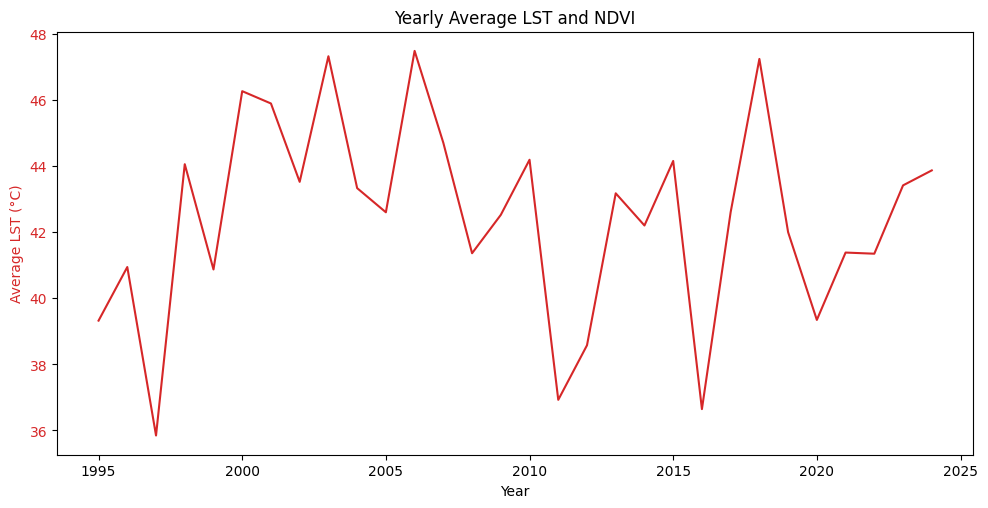

In [50]:
# Define the filtering values
qa_pixel_filter_1 = [5504, 5506, 54534, 54790, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 54852, 24144, 23888, 56660, 56916]
sr_qa_aerosol_filter_1 = [192, 194, 196, 224, 228]

industrial_pixels_gdf_filtered = industrial_pixels_gdf_l5_to_l9

industrial_pixels_gdf_filtered = industrial_pixels_gdf_filtered[industrial_pixels_gdf_filtered['region'] == 'Sungei Kadut Industrial Estate']

industrial_pixels_gdf_filtered = industrial_pixels_gdf_filtered[industrial_pixels_gdf_filtered['time'] >= pd.Timestamp('1995-01-01')]

# Filter out unwanted 'QA_PIXEL' values
industrial_pixels_gdf_filtered = industrial_pixels_gdf_filtered[~industrial_pixels_gdf_filtered['QA_PIXEL'].isin(qa_pixel_filter_1)]

# Further filter out unwanted 'SR_QA_AEROSOL' values
industrial_pixels_gdf_filtered = industrial_pixels_gdf_filtered[~industrial_pixels_gdf_filtered['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter_1)]

industrial_pixels_gdf_filtered['time'] = pd.to_datetime(industrial_pixels_gdf_filtered['time'])

# Extract year from 'time' for grouping
industrial_pixels_gdf_filtered['year'] = industrial_pixels_gdf_filtered['time'].dt.year

# Calculate yearly average LST and NDVI
yearly_avg_industrial = industrial_pixels_gdf_filtered.groupby('year').agg({
    'LST_Celsius': 'mean',
    'NDVI': 'mean'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

# Axis 1 - LST
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average LST (°C)', color=color)
ax1.plot(yearly_avg_industrial['year'], yearly_avg_industrial['LST_Celsius'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# # Axis 2 - NDVI
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# color = 'tab:green'
# ax2.set_ylabel('Average NDVI', color=color)  # we already handled the x-label with ax1
# ax2.plot(yearly_avg['year'], yearly_avg['NDVI'], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Yearly Average LST and NDVI')
plt.show()

In [51]:
yearly_avg_industrial

,year,LST_Celsius,NDVI
0,1995,39.322086,0.241961
1,1996,40.942776,0.227574
2,1997,35.848339,0.254042
3,1998,44.053288,0.232458
4,1999,40.869110,0.251984
5,2000,46.261459,0.234057
6,2001,45.888866,0.218142
7,2002,43.519279,0.242473
8,2003,47.317520,0.245278
9,2004,43.329041,0.222545


## Downtown Core

In [34]:
downtown_polygon = sg_polygons_gdf[sg_polygons_gdf['name'] == 'DOWNTOWN CORE']
downtown_polygon = downtown_polygon.rename(columns={'name': 'region'})

In [40]:
def preprocessing_cbd(tiff_data, downtown_polygon):
    with rasterio.open(tiff_data) as src:
        array = src.read()
        transform = src.transform
        src_crs = src.crs  # Source CRS
        dest_crs = 'EPSG:4326'  # WGS 84

        # Create a transformer object to convert from src_crs to dest_crs
        transformer = Transformer.from_crs(src_crs, dest_crs, always_xy=True)

        # Get arrays of column and row indices
        cols, rows = np.meshgrid(np.arange(array.shape[2]), np.arange(array.shape[1]))

        # Convert meshgrid arrays to coordinate arrays using rasterio's method, which are 2D
        xs, ys = rasterio.transform.xy(transform, rows, cols, offset='center')

        # Flatten the coordinate arrays to pass to transform function
        lon, lat = transformer.transform(np.array(xs).flatten(), np.array(ys).flatten())

        # Create DataFrame and convert to GeoDataFrame
        df = pd.DataFrame({'Longitude': lon, 'Latitude': lat})
        for i, band in enumerate(src.read(masked=True)):
            df[src.descriptions[i]] = band.flatten()

        gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
        gdf.set_crs('EPSG:4326', inplace=True)  # Ensure the CRS is set to WGS 84

        # Intersecting pixels
        joined_gdf = gdf.sjoin(downtown_polygon, how="inner", op='intersects', lsuffix='_left', rsuffix='_right')
        joined_gdf.rename(columns={'index_right': 'polygon', 'addr_housenumber': 'blk_no'}, inplace=True)

        return joined_gdf

In [41]:
# Suppress specific FutureWarnings related to GeoPandas
warnings.filterwarnings("ignore", category=FutureWarning, message="The `op` parameter is deprecated")

def process_files(base_path, low_cloud_cover_dates):
    downtown_pixels_gdf = pd.DataFrame()
    years = sorted(set(date[:4] for date in low_cloud_cover_dates))  # Extract years from dates

    for year in years:
        zip_file_path = os.path.join(base_path, f"{year}.zip")  # Adjust as needed for actual file naming
        if os.path.exists(zip_file_path):
            with zipfile.ZipFile(zip_file_path, 'r') as z:
                print(f"Processing contents of {zip_file_path}")
                # Iterate over each file in the ZIP
                for file in z.namelist():
                    # Check each date explicitly
                    for date in low_cloud_cover_dates:
                        if file.endswith('.tif') and date in file:
                            print(file)
                            print(f"Matching file found: {file} for date {date}")
                            with z.open(file) as tiff:
                                # Extract the date part from the date string
                                date_str = date[:8]  # Extract YYYYMMDD part only
                                # Process the TIFF file with the preprocessing function
                                pixels = preprocessing_cbd(BytesIO(tiff.read()), downtown_polygon)
                                print(f"Number of pixels in DOWNTOWN CORE: {len(pixels)}")
                                print(f"DataFrame memory usage after processing {file}: {pixels.memory_usage().sum() / 1024**2:.2f} MB")
                                # Convert date string to datetime object
                                pixels['time'] = datetime.strptime(date_str, "%Y%m%d")
                                downtown_pixels_gdf = pd.concat([downtown_pixels_gdf, pixels], ignore_index=True)
                                print(f"Processed TIFF: {file}")
                                print(f"Current size of downtown_pixels_gdf: {len(downtown_pixels_gdf)} rows")
                                print(f"Current memory usage of downtown_pixels_gdf: {downtown_pixels_gdf.memory_usage().sum() / 1024**2:.2f} MB")
                            break  # Stop checking other dates if a match is found
        else:
            print(f"ZIP file for {year} does not exist: {zip_file_path}")

    return downtown_pixels_gdf

# Paths for Landsat 8 and Landsat 9
base_path_L8 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8"
base_path_L9 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat9"

# Process files for both Landsat 8 and Landsat 9
downtown_pixels_L8 = process_files(base_path_L8, low_cloud_cover_dates)
downtown_pixels_L9 = process_files(base_path_L9, low_cloud_cover_dates)

# Combine the data from both satellites
downtown_pixels_gdf = pd.concat([downtown_pixels_L8, downtown_pixels_L9], ignore_index=True)
print("Processing complete. Number of processed pixels:", len(downtown_pixels_gdf))
print("Total memory usage of tengah_pixels_gdf DataFrame:", downtown_pixels_gdf.memory_usage().sum() / 1024**2, "MB")

ZIP file for 1990 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1990.zip
ZIP file for 1991 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1991.zip
ZIP file for 1992 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1992.zip
ZIP file for 1993 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1993.zip
ZIP file for 1994 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1994.zip
ZIP file for 1995 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1995.zip
ZIP file for 1996 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1996.zip
ZIP file for 1997 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1997.zip
ZIP file for 1998 does not exist: C:\LocalOneDri

In [42]:
downtown_pixels_gdf.to_csv(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Downtown_cc30_l8_l9.csv")

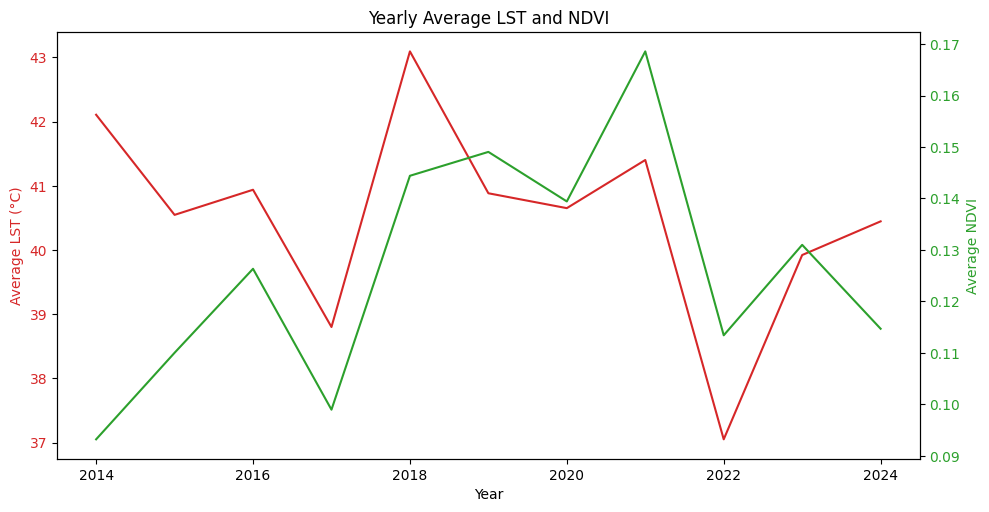

In [44]:
# Define the filtering values
qa_pixel_filter_1 = [5504, 5506, 54534, 54790, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 54852, 24144, 23888, 56660, 56916]
sr_qa_aerosol_filter_1 = [192, 194, 196, 224, 228]

downtown_pixels_gdf_filtered = downtown_pixels_gdf

# Filter out unwanted 'QA_PIXEL' values
downtown_pixels_gdf_filtered = downtown_pixels_gdf_filtered[~downtown_pixels_gdf_filtered['QA_PIXEL'].isin(qa_pixel_filter_1)]

# Further filter out unwanted 'SR_QA_AEROSOL' values
downtown_pixels_gdf_filtered = downtown_pixels_gdf_filtered[~downtown_pixels_gdf_filtered['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter_1)]

# Convert 'ST_B10' from digital numbers to Celsius (assuming 'ST_B10' represents band 10 temperature in Kelvin)
downtown_pixels_gdf_filtered['LST_Celsius'] = (downtown_pixels_gdf_filtered['ST_B10'] * 0.00341802 + 149) - 273.15

# Scale and offset values for SR_B4 (Near Infrared) and SR_B5 (Shortwave Infrared 1)
scale = 2.75e-05
offset = -0.2

# Apply scale and offset to the bands
downtown_pixels_gdf_filtered['SR_B4_Scaled'] = (downtown_pixels_gdf_filtered['SR_B4'] * scale) + offset
downtown_pixels_gdf_filtered['SR_B5_Scaled'] = (downtown_pixels_gdf_filtered['SR_B5'] * scale) + offset

# Calculate NDVI using the scaled values
downtown_pixels_gdf_filtered['NDVI'] = (
    (downtown_pixels_gdf_filtered['SR_B5_Scaled'] - downtown_pixels_gdf_filtered['SR_B4_Scaled']) / 
    (downtown_pixels_gdf_filtered['SR_B5_Scaled'] + downtown_pixels_gdf_filtered['SR_B4_Scaled'])
)

# Calculate NDVI using bands 4 and 5
downtown_pixels_gdf_filtered['NDVI'] = (downtown_pixels_gdf_filtered['SR_B5'] - downtown_pixels_gdf_filtered['SR_B4']) / (downtown_pixels_gdf_filtered['SR_B5'] + downtown_pixels_gdf_filtered['SR_B4'])

downtown_pixels_gdf_filtered['time'] = pd.to_datetime(downtown_pixels_gdf_filtered['time'])

# Extract year from 'time' for grouping
downtown_pixels_gdf_filtered['year'] = downtown_pixels_gdf_filtered['time'].dt.year

# Calculate yearly average LST and NDVI
yearly_avg_downtown = downtown_pixels_gdf_filtered.groupby('year').agg({
    'LST_Celsius': 'mean',
    'NDVI': 'mean'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

# Axis 1 - LST
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average LST (°C)', color=color)
ax1.plot(yearly_avg_downtown['year'], yearly_avg_downtown['LST_Celsius'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Axis 2 - NDVI
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Average NDVI', color=color)  # we already handled the x-label with ax1
ax2.plot(yearly_avg_downtown['year'], yearly_avg_downtown['NDVI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Yearly Average LST and NDVI')
plt.show()

In [47]:
yearly_avg_downtown

,year,LST_Celsius,NDVI
0,2014,42.106647,0.093227
1,2015,40.546803,0.110037
2,2016,40.938164,0.126346
3,2017,38.800087,0.098987
4,2018,43.093399,0.144409
5,2019,40.883396,0.149049
6,2020,40.651573,0.139428
7,2021,41.401592,0.168568
8,2022,37.050388,0.113430
9,2023,39.921246,0.130995
